# Topic Modeling on News Articles

Topic Modelling to segregate news report data to different topics using Gensim, NLTK, Spacy.

Topic modelling as the name suggests, it is a process to automatically identify topics present in a text object and to derive hidden patterns exhibited by a text corpus.

Topics can be defined as “a repeating pattern of co-occurring terms in a corpus”. A good topic model should result in <li>– “health”, “doctor”, “patient”, “hospital” for a topic – Healthcare, <li>and “farm”, “crops”, “wheat” for a topic – “Farming”. 

We have a dataset which consists of **News articles** and our task is to assign topics to those articles.
    
We will do a simple LSI and a LDA method to figure out the topics

Task consist of :

<lu> **1. Loading the data**
    
<lu> **2. Clean the Data**
Transforming text into something an algorithm can digest it a complicated process. We cannot feed the data as it is, some preprocessing needs to be done. In this task we will be doing some preprocessing to convert our data in a form that we can feed our model with.
    
<li> **. Handling the Stop-words**
    
Text may contain stop words like ‘the’, ‘is’, ‘are’. Stop words can be filtered from the text to be processed. There is no universal list of stop words in nlp research, however the nltk module contains a list of stop words. We will remove these stopwords in this task.
    
<li> **. Lemmatization**
    
<lu> **3. TF-IDF Vectorization**
    
Apart from Count vectorizer an alternative to calculate word frequencies , and by far the most popular method is called TF-IDF. This is an acronym than stands for “Term Frequency – Inverse Document” Frequency which are the components of the resulting scores assigned to each word.
    
   
<lu> **4. Topic Modelling using Gensim's LDA**
    
LDA is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions. 

* Each document is modeled as a multinomial distribution of topics and each topic is modeled as a multinomial distribution of words.
* LDA assumes that the every chunk of text we feed into it will contain words that are somehow related. Therefore choosing the right corpus of data is crucial. 
* It also assumes documents are produced from a mixture of topics. Those topics then generate words based on their probability distribution. 
    
<lu> **4. Topic modelling using LSA**
    
Latent Semantic Analysis, or LSA, is one of the foundational techniques in topic modeling. The core idea is to take a matrix of what we have — documents and terms — and decompose it into a separate document-topic matrix and a topic-term matrix.

# Loading the data

In [73]:
#imports
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
from nltk.tokenize import word_tokenize
from collections import Counter
import operator
import numpy as np




c:\users\inpt\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
import warnings
warnings.filterwarnings('ignore')  # Let's not pay heed to them right now"

c:\users\inpt\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [80]:
from sklearn.datasets import fetch_20newsgroups
# Dictionary with 'data' as key and each review as an element of list
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
dataset

{'data': ["Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n",
  "\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a l

In [81]:
# list of articles
documents = dataset.data

In [82]:
documents

["Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n",
 "\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap

In [83]:
# Dataframe with a column `document` containing all the articles
news_df = pd.DataFrame({'document':documents})

In [84]:
news_df

,document
0,Well i'm not sure about the story nad it did s...
1,"\n\n\n\n\n\n\nYeah, do you expect people to re..."
2,Although I realize that principle is not one o...
3,Notwithstanding all the legitimate fuss about ...
4,"Well, I will have to change the scoring on my ..."
...,...
11309,"Danny Rubenstein, an Israeli journalist, will ..."
11310,\n
11311,\nI agree. Home runs off Clemens are always m...
11312,I used HP DeskJet with Orange Micros Grappler ...


In [85]:
print(news_df.head())

                                            document
0  Well i'm not sure about the story nad it did s...
1  \n\n\n\n\n\n\nYeah, do you expect people to re...
2  Although I realize that principle is not one o...
3  Notwithstanding all the legitimate fuss about ...
4  Well, I will have to change the scoring on my ...


# Clean the Data

Transforming text into something an algorithm can digest it a complicated process. We cannot feed the data 
as it is, some preprocessing needs to be done. 
In this task we will be doing some preprocessing to convert our data in a form that we can feed our model with.'''



In [98]:
news_df = news_df[:100]
tokenized_doc = news_df['document'].str.replace("[^a-zA-Z#]", " ")
news_df.shape

(100, 1)

In [99]:
def clean_doc(text):
    #for token in text:
    text =  ' '.join([w.lower() for w in text.split() if len(w)>3])
    return text;

tokenized_doc = tokenized_doc.apply(clean_doc)
tokenized_doc

0     well sure about story seem biased what disagre...
1     yeah expect people read actually accept hard a...
2     although realize that principle your strongest...
3     notwithstanding legitimate fuss about this pro...
4     well will have change scoring playoff pool unf...
                            ...                        
95    follow mark last posting current investigation...
96    could folk song clementine memory serves part ...
97    first chip doesn that runs megabits second whi...
98    created image gaea therefore must pinnacle cre...
99    sale pontiac grand prix white white rims gray ...
Name: document, Length: 100, dtype: object

#### Handling the Stop-words and Punctuation-->Lemmatization

In [101]:
#import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
  
stopwords_set = set(stopwords.words('english'))
custom = list(stopwords_set)+list(punctuation)

def stopWordRemoval(text):
    text = word_tokenize(text)
    text = ' '.join([word for word in text if word not in custom])
    return text

tokenized_doc = tokenized_doc.apply(stopWordRemoval)
tokenized_doc

# Initializing wordnet lemmatizer
lemmatizer = WordNetLemmatizer()

def lemData(text):
    text = word_tokenize(text)
    newText = []
    for word in text:
        newText.append(lemmatizer.lemmatize(word))
    return ' '.join(newText)

doc_clean = tokenized_doc.apply(lemData)
doc_clean


0     well sure story seem biased disagree statement...
1     yeah expect people read actually accept hard a...
2     although realize principle strongest point wou...
3     notwithstanding legitimate fuss proposal much ...
4     well change scoring playoff pool unfortunately...
                            ...                        
95    follow mark last posting current investigation...
96    could folk song clementine memory serf part go...
97    first chip run megabit second beyond need voic...
98    created image gaea therefore must pinnacle cre...
99    sale pontiac grand prix white white rim gray i...
Name: document, Length: 100, dtype: object

In [110]:
# Creating a list of documents from the complaints column
list_of_docs = doc_clean.tolist()

# Implementing the function for all the complaints of list_of_docs
doc_clean = [doc.split() for doc in list_of_docs]

In [111]:
doc_clean

[['well',
  'sure',
  'story',
  'seem',
  'biased',
  'disagree',
  'statement',
  'medium',
  'ruin',
  'israel',
  'reputation',
  'rediculous',
  'medium',
  'israeli',
  'medium',
  'world',
  'lived',
  'europe',
  'realize',
  'incidence',
  'described',
  'letter',
  'occured',
  'medium',
  'whole',
  'seem',
  'ignore',
  'subsidizing',
  'israel',
  'existance',
  'european',
  'least',
  'degree',
  'think',
  'might',
  'reason',
  'report',
  'clearly',
  'atrocity',
  'shame',
  'austria',
  'daily',
  'report',
  'inhuman',
  'act',
  'commited',
  'israeli',
  'soldier',
  'blessing',
  'received',
  'government',
  'make',
  'holocaust',
  'guilt',
  'away',
  'look',
  'jew',
  'treating',
  'race',
  'power',
  'unfortunate'],
 ['yeah',
  'expect',
  'people',
  'read',
  'actually',
  'accept',
  'hard',
  'atheism',
  'need',
  'little',
  'leap',
  'faith',
  'jimmy',
  'logic',
  'run',
  'steam',
  'sorry',
  'pity',
  'sorry',
  'feeling',
  'denial',
  'faith

## LDA ##



Some of the initialisations necessary for LDA are:
* **id2word** is a mapping from word ids (integers) to words (strings). It is used to determine the vocabulary size, as well as for debugging and topic printing.
* **word2id** is a mapping from words (strings) to word ids (integers). It is used to determine the vocabulary size, as well as for debugging and topic printing.
* **vocab** is a list of words (strings). It is used to determine the various words used in the text, as well as for debugging and topic printing.

In [117]:
import gensim


from gensim import corpora
import string
from gensim.models.ldamodel import LdaModel

# Creating the dictionary id2word from our cleaned word list doc_clean
dictionary = corpora.Dictionary(doc_clean)

# Creating the corpus
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Creating the LDA model
ldamodel = LdaModel(corpus=doc_term_matrix, num_topics=5,id2word=dictionary, random_state=20, passes=30)

In [118]:
from pprint import pprint
# printing the topics
pprint(ldamodel.print_topics())

[(0,
  '0.018*"graphic" + 0.010*"mail" + 0.009*"image" + 0.009*"file" + '
  '0.008*"send" + 0.007*"object" + 0.006*"format" + 0.006*"server" + '
  '0.006*"also" + 0.005*"tracer"'),
 (1,
  '0.011*"israel" + 0.007*"israeli" + 0.006*"would" + 0.004*"even" + '
  '0.004*"mormon" + 0.004*"soldier" + 0.004*"time" + 0.004*"year" + '
  '0.004*"lebanese" + 0.004*"peace"'),
 (2,
  '0.006*"think" + 0.005*"well" + 0.005*"like" + 0.004*"much" + 0.004*"year" + '
  '0.003*"thing" + 0.003*"cache" + 0.003*"would" + 0.003*"bike" + '
  '0.003*"want"'),
 (3,
  '0.006*"time" + 0.005*"good" + 0.005*"jesus" + 0.004*"life" + 0.004*"power" '
  '+ 0.004*"know" + 0.004*"creation" + 0.004*"better" + 0.004*"torrey" + '
  '0.003*"would"'),
 (4,
  '0.008*"like" + 0.006*"know" + 0.006*"chip" + 0.005*"would" + '
  '0.004*"government" + 0.004*"system" + 0.004*"another" + 0.004*"good" + '
  '0.004*"could" + 0.004*"need"')]


## LDA on TFIDF vectoriser

In [120]:
from gensim import models
# train the model
tfidf = models.TfidfModel(doc_term_matrix)
corpus_tfidf = tfidf[doc_term_matrix]

In [121]:
# Creating the LDA model
ldamodel = LdaModel(corpus=corpus_tfidf, num_topics=5,id2word=dictionary, random_state=20, passes=30)

# printing the topics
pprint(ldamodel.print_topics())

[(0,
  '0.001*"chris" + 0.001*"vram" + 0.001*"friend" + 0.001*"captain" + '
  '0.001*"cjackson" + 0.001*"port" + 0.001*"economical" + '
  '0.001*"photosynthetic" + 0.001*"variety" + 0.001*"horn"'),
 (1,
  '0.001*"keyboard" + 0.001*"title" + 0.001*"mormon" + 0.001*"would" + '
  '0.001*"value" + 0.001*"work" + 0.001*"kepley" + 0.001*"name" + 0.001*"chip" '
  '+ 0.001*"info"'),
 (2,
  '0.001*"bike" + 0.001*"comic" + 0.001*"manta" + 0.001*"chip" + '
  '0.001*"manufacturer" + 0.001*"death" + 0.001*"think" + 0.001*"memory" + '
  '0.001*"scoring" + 0.001*"motorcycle"'),
 (3,
  '0.001*"chain" + 0.001*"mike" + 0.001*"know" + 0.001*"lyric" + '
  '0.001*"creation" + 0.001*"bird" + 0.001*"moral" + 0.001*"power" + '
  '0.001*"lunar" + 0.001*"brad"'),
 (4,
  '0.001*"phone" + 0.001*"cache" + 0.001*"rule" + 0.001*"company" + '
  '0.001*"pick" + 0.001*"prizm" + 0.001*"card" + 0.001*"israel" + '
  '0.001*"answer" + 0.001*"nature"')]


# Evaluation Metric

#### What is topic coherence?

Topic Coherence measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic. These measurements help distinguish between topics that are semantically interpretable topics and topics that are artifacts of statistical inference.

In [122]:
from gensim.models.coherencemodel import CoherenceModel

# Compute Coherence Score
#Topic Coherence measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic. These measurements help distinguish between topics that are semantically interpretable topics and topics that are artifacts of statistical inference.
coherence_model_lda = CoherenceModel(model=ldamodel, texts=doc_clean, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5733058708762856


## Best K topics

Let’s now define a function to compute the topic coherence for a given num_topics value and apply it to the num_topics values used in Latent Semantic Indexing in Python

The last step is to find the optimal number of topics
We need to build many LDA models with different values of the number of topics (k) and pick the one that gives the highest coherence value.



In [130]:
def compute_coherence_values(dictionary, corpus, texts, limit, step, start=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [131]:
#To DO 
#plot coherence distribution and choose best k
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=doc_clean, start=2, limit=10, step=1)


In [132]:
coherence_values

[0.40186156296580255,
 0.5429350765386625,
 0.5303438647203103,
 0.5722732168007945,
 0.5478162616599996,
 0.5424257362147866,
 0.5337420274531499,
 0.5370869157847766]

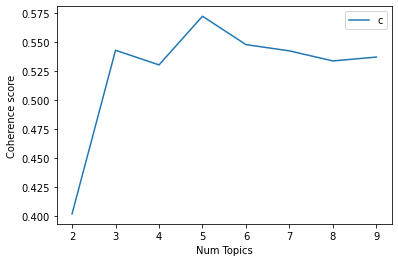

In [133]:
# Show graph
import matplotlib.pyplot as plt
limit=10; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

<li> Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics. Picking an even higher value can sometimes provide more granular sub-topics. 

<li>If you see the same keywords being repeated in multiple topics, it’s probably a sign that the ‘k’ is too large.

The above plot shows that coherence score increases with the number of topics, with a decline between 3 to 4.

Now, choosing the number of topics still depends on your requirement because topic around 5 have good coherence scores but may have repeated keywords in the topic. Topic coherence gives you a good picture so that you can take better decision.

# pyLDAvis Visualization

pyLDAvis is designed to help users interpret the topics in a topic model that has been fit to a corpus of text data. The package extracts information from a fitted LDA topic model to inform an interactive web-based visualization.

In [134]:
#!pip install pyLDAvis.gensim


import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()#enable automatic D3 display of prepared model data in the IPython notebook.

vis = gensimvis.prepare(ldamodel, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.003758 -0.008400       1        1  55.530501
1      0.011201  0.000545       2        1  15.491735
3     -0.004530  0.008688       3        1  15.065684
2     -0.001811 -0.001078       4        1   9.323944
0     -0.001103  0.000245       5        1   4.588136, topic_info=        Term      Freq     Total Category  logprob  loglift
729    chris  3.000000  3.000000  Default  30.0000  30.0000
3799    vram  3.000000  3.000000  Default  29.0000  29.0000
3527    bike  3.000000  3.000000  Default  28.0000  28.0000
3542  friend  2.000000  2.000000  Default  27.0000  27.0000
497   memory  4.000000  4.000000  Default  26.0000  26.0000
...      ...       ...       ...      ...      ...      ...
2716    mary  0.285432  3.353255   Topic5  -7.5112   0.6180
497   memory  0.302017  4.650820   Topic5  -7.4547   0.3474
2546    game  0.299639  4.677609   Topic5  -7.4627   0.3337
951    exist  0.279478  5.006328   Topic5  -7.5323   0.1962
76      much  0.276790  4.269111   Topic5  -7.5420   0.3458

[237 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
55        1  0.470112    actually
55        3  0.235056    actually
55        4  0.235056    actually
2536      1  0.841909  adirondack
3486      1  0.336752   admitting
...     ...       ...         ...
186       1  0.670430        year
186       2  0.167607        year
186       3  0.167607        year
186       4  0.167607        year
3564      1  0.391177        zmed

[393 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 4, 3, 1])

 ## How to predict the topics for a new piece of text?

In [135]:
newsgroups_test = fetch_20newsgroups(subset='test', shuffle = True, random_state=1, remove=('headers', 'footers', 'quotes'))
num = 100
unseen_document = newsgroups_test.data[num]
print(unseen_document)

I'm wondering if I can tote my American touch tone phone around with me
to Sweden and Germany.  It's DC powered, and I can buy a special adapter
for that in Europe.  The question is if the general electronics work
the same.  I can buy a different wall plug and refit it (I'm sure I'd
have to), but would that do the trick?


Assuming that you have already built the topic model, you need to take the text through the same routine of transformations and before predicting the topic.

For our case, the order of transformations is:

sent_to_words() –> lemmatization() –> vectorizer.transform() –> best_lda_model.transform()

You need to apply these transformations in the same order. So to simplify it, let’s combine these steps into a preprocess() function.

In [155]:
# Define function to predict topic for a given text document.


def preprocess(text):
    
    # Step 1: Clean with simple_preprocess
    mytext_2 =  text.replace("[^a-zA-Z#]", " ")
    mytext_3=clean_doc(mytext_2)
    mytext_4=stopWordRemoval(mytext_3)


    # Step 2: Lemmatize
    mytext_5 = lemData(mytext_4)
    
    # Step 3: Vectorize transform
   # mytext_6 = dictionary.doc2bow(mytext_5)#tfidf.transform(mytext_3)

    # Step 4: LDA Transform
    #topic_probability_scores = ldamodel.transform(mytext_6)
    #topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), :].values.tolist()
    return mytext_5.split()#topic, topic_probability_scores

# Predict the topic

#topic, prob_scores = predict_topic(text = unseen_document)
#print(topic)

In [156]:
preprocess(unseen_document)

['wondering',
 'tote',
 'american',
 'touch',
 'tone',
 'phone',
 'around',
 'sweden',
 'germany',
 'powered',
 'special',
 'adapter',
 'europe',
 'question',
 'general',
 'electronics',
 'work',
 'different',
 'wall',
 'plug',
 'refit',
 'sure',
 'would',
 'trick']

In [162]:
#  predicting new text 
new_text_corpus =  dictionary.doc2bow(preprocess(unseen_document))
ldamodel[new_text_corpus]

[(0, 0.010859766),
 (1, 0.64452827),
 (2, 0.010709478),
 (3, 0.010852897),
 (4, 0.32304963)]

In [163]:
for index, score in sorted(ldamodel[new_text_corpus], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, ldamodel.print_topic(index, 5)))

Score: 0.64457768201828	 Topic: 0.001*"keyboard" + 0.001*"title" + 0.001*"mormon" + 0.001*"would" + 0.001*"value"
Score: 0.32300007343292236	 Topic: 0.001*"phone" + 0.001*"cache" + 0.001*"rule" + 0.001*"company" + 0.001*"pick"
Score: 0.010859785601496696	 Topic: 0.001*"chris" + 0.001*"vram" + 0.001*"friend" + 0.001*"captain" + 0.001*"cjackson"
Score: 0.010852908715605736	 Topic: 0.001*"chain" + 0.001*"mike" + 0.001*"know" + 0.001*"lyric" + 0.001*"creation"
Score: 0.010709479451179504	 Topic: 0.001*"bike" + 0.001*"comic" + 0.001*"manta" + 0.001*"chip" + 0.001*"manufacturer"


# Gensim LSI 

In [165]:
from gensim.models.lsimodel import LsiModel

In [166]:
# Creating the LSi model
lsimodel = LsiModel(corpus=doc_term_matrix, num_topics=5, id2word=dictionary)
pprint(lsimodel.print_topics())

[(0,
  '0.435*"graphic" + 0.249*"mail" + 0.228*"image" + 0.224*"file" + '
  '0.191*"send" + 0.174*"object" + 0.158*"format" + 0.157*"server" + '
  '0.137*"also" + 0.124*"tracer"'),
 (1,
  '-0.463*"israel" + -0.322*"israeli" + -0.205*"soldier" + -0.204*"lebanese" + '
  '-0.183*"peace" + -0.181*"village" + -0.136*"zone" + -0.133*"would" + '
  '-0.122*"people" + -0.118*"time"'),
 (2,
  '0.231*"know" + 0.218*"would" + 0.216*"like" + 0.210*"good" + '
  '-0.198*"israel" + 0.194*"patch" + 0.170*"contact" + 0.170*"bike" + '
  '0.145*"life" + 0.143*"jesus"'),
 (3,
  '0.348*"adirondack" + 0.280*"john" + 0.278*"providence" + 0.278*"cape" + '
  '0.278*"rochester" + 0.278*"fredericton" + 0.278*"breton" + '
  '0.278*"baltimore" + 0.278*"moncton" + 0.278*"utica"'),
 (4,
  '-0.293*"patch" + -0.267*"contact" + -0.248*"bike" + -0.216*"force" + '
  '0.193*"life" + 0.188*"good" + 0.168*"jesus" + -0.163*"motorcycle" + '
  '-0.160*"wheel" + -0.160*"effect"')]


# Word Cloud Visualization

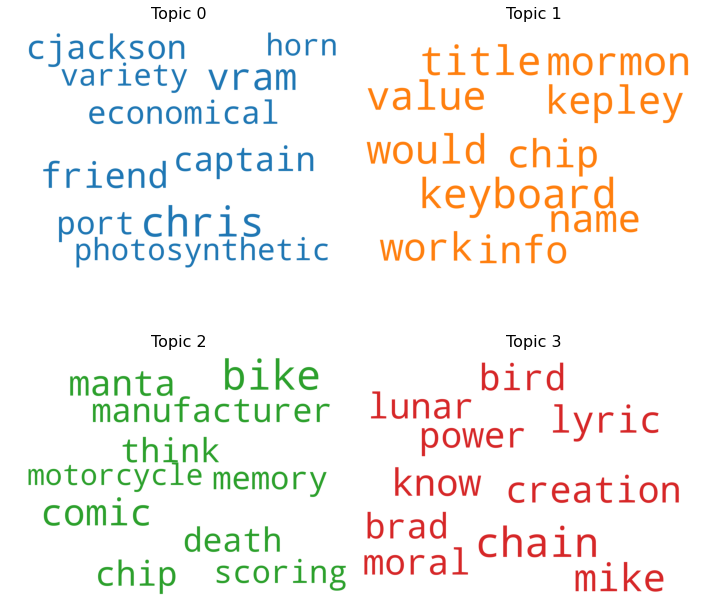

In [167]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
fig.savefig('word_cloud.png')
plt.show()